# Introduction
<img src="images/LinkNYC_kiosks.jpg",width=600, height=600>

In [1]:
import numpy as np
import pandas as pd

In [2]:
LinkNYC_kiosks_location = pd.read_csv('~/dss4/LinkNYC/wifi_related_csv/LinkNYC_Locations.csv')
subway_entrance_location = pd.read_csv('~/dss4/LinkNYC/nyc_subway/NYC_Transit_Subway_Entrance_And_Exit_data.csv')

In [3]:
LinkNYC_kiosks_location.tail()

,CB Link ID,Boro,Community Board,Latitude,Longitude,Link Installation Status,Smallest PPT,Street Address,Kiosk Bearing,Boro ID,Link Site ID,Link Smoke Tested and Activated (A),Link Installation (A),Location
632,LINK-018388,Staten Island,502,40.579636,-74.100654,A - Link Live,145736,2083 Hylan Blvd,NaN,NaN,si-02-145736,2/28/17,02/19/2017,"(40.579635722347497, -74.100653709118305)"
633,LINK-018405,Staten Island,502,40.597715,-74.083828,A - Link Live,145732,1232 Hylan Blvd,NaN,NaN,si-02-145732,2/28/17,02/19/2017,"(40.597715078535202, -74.083828345887497)"
634,LINK-018406,Staten Island,502,40.598002,-74.083050,A - Link Live,145735,1220 Hylan Blvd,NaN,NaN,si-02-145735,2/28/17,02/19/2017,"(40.598001994381299, -74.083050385855003)"
635,LINK-018407,Staten Island,502,40.581309,-74.112015,A - Link Live,145733,2110 Richmond Rd,NaN,NaN,si-02-145733,2003-02-17,02/19/2017,"(40.581309259206897, -74.112015365225602)"
636,LINK-019377,Staten Island,502,40.564789,-74.115318,A - Link Live,145738,2754 Hylan Blvd,NaN,NaN,si-02-145738,2/28/17,02/19/2017,"(40.564788999999998, -74.115318000000002)"


In [4]:
boros = set(LinkNYC_kiosks_location["Boro"])
for boro in boros:
    print boro, sum(LinkNYC_kiosks_location['Boro'] == boro)

Bronx 41
Brooklyn 31
Staten Island 20
Manhattan 503
Queens 42


In [5]:
subway_entrance_location.tail()

,Division,Line,Station Name,Station Latitude,Station Longitude,Route1,Route2,Route3,Route4,Route5,...,ADA,ADA Notes,Free Crossover,North South Street,East West Street,Corner,Entrance Latitude,Entrance Longitude,Station Location,Entrance Location
1863,IRT,White Plains Road,Wakefield-241st St,40.903125,-73.85062,2,5,NaN,NaN,NaN,...,False,NaN,True,White Plains Rd,241st St,NW,40.903597,-73.850360,"(40.903125, -73.85062)","(40.903597, -73.850360)"
1864,IRT,White Plains Road,Wakefield-241st St,40.903125,-73.85062,2,5,NaN,NaN,NaN,...,False,NaN,True,White Plains Rd,241st St,SE,40.903283,-73.850321,"(40.903125, -73.85062)","(40.903283, -73.850321)"
1865,IRT,White Plains Road,Wakefield-241st St,40.903125,-73.85062,2,5,NaN,NaN,NaN,...,False,NaN,True,White Plains Rd,241st St,NE,40.903509,-73.850124,"(40.903125, -73.85062)","(40.903509, -73.850124)"
1866,IRT,Flushing,34 St Hudson Yards,40.755882,-74.00191,7,NaN,NaN,NaN,NaN,...,True,NaN,True,34th St,Hudson Boulevard (East),SW,40.754904,-74.001323,"(40.755882, -74.00191)","(40.754904, -74.001323)"
1867,IRT,Flushing,34 St Hudson Yards,40.755882,-74.00191,7,NaN,NaN,NaN,NaN,...,True,NaN,True,34th St,Hudson Boulevard (East),SW,40.754937,-74.000961,"(40.755882, -74.00191)","(40.754937, -74.000961)"


In [6]:
nun_stations = len(set(subway_entrance_location['Station Name']))
print nun_stations,"stations,", len(subway_entrance_location)/float(nun_stations),'entrances per station'

356 stations, 5.24719101124 entrances per station


# Part 1. Geographical Analysis
## Plotting kioks with plotly

In [7]:
import plotly.plotly as py
from plotly.graph_objs import *

mapbox_access_token = 'pk.eyJ1IjoiY2hlbHNlYXBsb3RseSIsImEiOiJjaXFqeXVzdDkwMHFrZnRtOGtlMGtwcGs4In0.SLidkdBMEap9POJGIe1eGw'

kiosk_latitude_list = LinkNYC_kiosks_location.Latitude.tolist() # series to list
kiosk_longitude_list = LinkNYC_kiosks_location.Longitude.tolist() # series to list
kiosk_street_address = LinkNYC_kiosks_location.ix[:, 7].tolist() # series to list

subway_entrance_latitude_list = subway_entrance_location.ix[:, 3].tolist()
subway_entrance_longitude_list = subway_entrance_location.ix[:, 4].tolist()
subway_entrance_name_list = subway_entrance_location.ix[:, 2].tolist()


data = Data([
    Scattermapbox(
        lat=kiosk_latitude_list, # plotting.
        lon=kiosk_longitude_list,
        mode='markers',
        marker=Marker(
            size=6
        ),
        text= kiosk_street_address, # add street name to every marker
        name = "NYCLink"
    ),
    Scattermapbox(
        lat=subway_entrance_latitude_list, # plotting.
        lon=subway_entrance_longitude_list,
        mode='markers',
        marker=Marker(
            size=4
        ),
        text= subway_entrance_name_list, # add street name to every marker
        name = "Subway Station"
    )
])
layout = Layout(
    title='LinkNYC Kiosk & Subway Station',
    autosize=False, # False: could adjust the graph size manually
    width=1000,
    height=1000,
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat= 40.730534,
            lon= -73.907244 # where I want to make the center of my map
        ),
        pitch=0,
        zoom=10
    ),
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='Multiple Mapbox', validate=False)

### Let's compare with the map which LinkNYC uploaded on its website.

<img src="LinkNYC_kiosks_map.png",width=700,height=700>

### Are you sure, LinkNYC? It does not look you have that many kiosks now.

## Pedestrian stats

In [8]:
#import pandas as pd
pedestrian = pd.read_csv('~/dss4/LinkNYC/population_related_csv/PedCountLocationsMay2015.csv')

In [9]:
pedestrian = pedestrian.rename(columns = {'the_geom':'location'})
pedestrian.tail()

,location,Loc,Borough,Street,From_,To,Index,May07_D,May07_AM,May07_PM,...,Sept14_D,Sept14_AM,Sept14_PM,Sept14_D2,Sept14_MD,May15_D,May15_AM,May15_PM,May15_D2,May15_MD
109,POINT (-73.93313302788228 40.81413106797777),110,Harlem River Bridges,Madison Avenue Bridge,midpoint,NaN,N,5/8/2007,145,305,...,09/18/14,348,458,09/13/14,182,2005-06-15,356,542,05/16/15,193
110,POINT (-73.93252967704335 40.8075548101035),111,Harlem River Bridges,Third Avenue Bridge,midpoint,NaN,N,5/8/2007,49,126,...,2010-02-14,196,360,09/20/14,188,05/21/15,217,364,05/16/15,210
111,POINT (-73.9289610791785 40.803769279822085),112,Harlem River Bridges,Willis Avenue Bridge,midpoint,NaN,N,5/10/2007,57,118,...,09/23/14,168,351,09/20/14,148,05/20/15,133,319,2005-09-15,122
112,POINT (-73.92785197149043 40.80034506063932),113,Harlem River Bridges,Triborough Bridge (Manhattan span),midpoint,NaN,N,5/10/2007,17,35,...,09/23/14,21,42,09/20/14,20,05/20/15,19,36,2005-09-15,14
113,POINT (-73.93686603590562 40.78611224350855),114,Harlem River Bridges,Wards Island Bridge,midpoint,NaN,N,5/10/2007,57,207,...,09/23/14,123,458,09/20/14,564,05/20/15,189,539,2005-09-15,312


In [10]:
ped_latitude = []
ped_longitude = []
for i in range(len(pedestrian.ix[:, 0].tolist())):
    ped_latitude.append(float(pedestrian.ix[:, 0].tolist()[i][7:-1].split(" ")[1]))
    ped_longitude.append(float(pedestrian.ix[:, 0].tolist()[i][7:-1].split(" ")[0]))

pedestrian.insert(0, "Latitude", ped_latitude)
pedestrian.insert(1, "Longitude", ped_longitude)

In [11]:
pedestrian.tail()

,Latitude,Longitude,location,Loc,Borough,Street,From_,To,Index,May07_D,...,Sept14_D,Sept14_AM,Sept14_PM,Sept14_D2,Sept14_MD,May15_D,May15_AM,May15_PM,May15_D2,May15_MD
109,40.814131,-73.933133,POINT (-73.93313302788228 40.81413106797777),110,Harlem River Bridges,Madison Avenue Bridge,midpoint,NaN,N,5/8/2007,...,09/18/14,348,458,09/13/14,182,2005-06-15,356,542,05/16/15,193
110,40.807555,-73.932530,POINT (-73.93252967704335 40.8075548101035),111,Harlem River Bridges,Third Avenue Bridge,midpoint,NaN,N,5/8/2007,...,2010-02-14,196,360,09/20/14,188,05/21/15,217,364,05/16/15,210
111,40.803769,-73.928961,POINT (-73.9289610791785 40.803769279822085),112,Harlem River Bridges,Willis Avenue Bridge,midpoint,NaN,N,5/10/2007,...,09/23/14,168,351,09/20/14,148,05/20/15,133,319,2005-09-15,122
112,40.800345,-73.927852,POINT (-73.92785197149043 40.80034506063932),113,Harlem River Bridges,Triborough Bridge (Manhattan span),midpoint,NaN,N,5/10/2007,...,09/23/14,21,42,09/20/14,20,05/20/15,19,36,2005-09-15,14
113,40.786112,-73.936866,POINT (-73.93686603590562 40.78611224350855),114,Harlem River Bridges,Wards Island Bridge,midpoint,NaN,N,5/10/2007,...,09/23/14,123,458,09/20/14,564,05/20/15,189,539,2005-09-15,312


In [12]:
drop = ['location', 'Loc', 'Index']
for col in drop:
    pedestrian = pedestrian.drop(col, 1) # delete the columns which is not needed.
    

In [13]:
pedestrian.tail()

,Latitude,Longitude,Borough,Street,From_,To,May07_D,May07_AM,May07_PM,May07_D2,...,Sept14_D,Sept14_AM,Sept14_PM,Sept14_D2,Sept14_MD,May15_D,May15_AM,May15_PM,May15_D2,May15_MD
109,40.814131,-73.933133,Harlem River Bridges,Madison Avenue Bridge,midpoint,NaN,5/8/2007,145,305,5/5/2007,...,09/18/14,348,458,09/13/14,182,2005-06-15,356,542,05/16/15,193
110,40.807555,-73.932530,Harlem River Bridges,Third Avenue Bridge,midpoint,NaN,5/8/2007,49,126,5/5/2007,...,2010-02-14,196,360,09/20/14,188,05/21/15,217,364,05/16/15,210
111,40.803769,-73.928961,Harlem River Bridges,Willis Avenue Bridge,midpoint,NaN,5/10/2007,57,118,5/5/2007,...,09/23/14,168,351,09/20/14,148,05/20/15,133,319,2005-09-15,122
112,40.800345,-73.927852,Harlem River Bridges,Triborough Bridge (Manhattan span),midpoint,NaN,5/10/2007,17,35,5/5/2007,...,09/23/14,21,42,09/20/14,20,05/20/15,19,36,2005-09-15,14
113,40.786112,-73.936866,Harlem River Bridges,Wards Island Bridge,midpoint,NaN,5/10/2007,57,207,5/5/2007,...,09/23/14,123,458,09/20/14,564,05/20/15,189,539,2005-09-15,312


In [14]:
import plotly.plotly as py
from plotly.graph_objs import *

mapbox_access_token = 'pk.eyJ1IjoiY2hlbHNlYXBsb3RseSIsImEiOiJjaXFqeXVzdDkwMHFrZnRtOGtlMGtwcGs4In0.SLidkdBMEap9POJGIe1eGw'

ped_latitude_list = pedestrian.Latitude.tolist() # series to list
ped_longitude_list = pedestrian.Longitude.tolist() # series to list
ped_borough = pedestrian.ix[:, 2].tolist() # series to list

data = Data([
    Scattermapbox(
        lat=ped_latitude_list, # plotting.
        lon=ped_longitude_list,
        mode='markers',
        marker=Marker(color = 'black',
            size= 0.005 * pedestrian['Sept14_AM'] # the size is proportional to the number of pedestrian
        ),
        text= ped_borough, # add street name to every marker
        name = "2014 September weekdays AM"
    ),
    
    Scattermapbox(
        lat=ped_latitude_list, # plotting.
        lon=ped_longitude_list,
        mode='markers',
        marker=Marker(color = 'red',
            size= 0.005 * pedestrian['Sept14_PM'] # Had to multiply 2/3 to the number of pedestrian during PM .It is collected for 3 hours while the ohters are for 2hours
        ),
        text= ped_borough, # add street name to every marker
        name = "2014 September weekdays PM"
    ),
    
    Scattermapbox(
        lat=ped_latitude_list, # plotting.
        lon=ped_longitude_list,
        mode='markers',
        marker=Marker(color = 'pink',
            size= 0.005 * pedestrian['Sept14_MD'] # the size is proportional to the number of pedestrian
        ),
        text= ped_borough, # add street name to every marker
        name = "2014 September weekends"
    )
])
layout = Layout(
    title='The number of pedestrians, September 2014',
    autosize=False,
    width=1000,
    height=1000,
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat= 40.730534,
            lon= -73.907244 # where I want to make the center of my map
        ),
        pitch=0,
        zoom=10
    ),
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='Multiple Mapbox', validate=False)

In [15]:
data = Data([
    Scattermapbox(
        lat=ped_latitude_list, # plotting.
        lon=ped_longitude_list,
        mode='markers',
        marker=Marker(color = 'black',
            size= 0.005 * pedestrian['May15_AM'] # the size is proportional to the number of pedestrian
        ),
        text= ped_borough, # add street name to every marker
        name = "2015 May weekdays AM"
    ),
    
    Scattermapbox(
        lat=ped_latitude_list, # plotting.
        lon=ped_longitude_list,
        mode='markers',
        marker=Marker(color = 'red',
            size= 0.005 * pedestrian['May15_PM'] # Had to multiply 2/3 to the number of pedestrian during PM .It is collected for 3 hours while the ohters are for 2hours
        ),
        text= ped_borough, # add street name to every marker
        name = "2015 May weekdays PM"
    ),
    
    Scattermapbox(
        lat=ped_latitude_list, # plotting.
        lon=ped_longitude_list,
        mode='markers',
        marker=Marker(color = 'pink',
            size= 0.005 * pedestrian['May15_MD'] # the size is proportional to the number of pedestrian
        ),
        text= ped_borough, # add street name to every marker
        name = "2015 May weekends"
    )
])
layout = Layout(
    title='The number of pedestrians, May 2015',
    autosize=False,
    width=1000,
    height=1000,
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat= 40.730534,
            lon= -73.907244 # where I want to make the center of my map
        ),
        pitch=0,
        zoom=10
    ),
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='Multiple Mapbox', validate=False)

### Are these plottings above reasonable? *Yes, we can see almost same pattern for the last years*

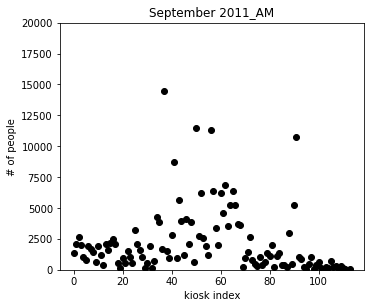

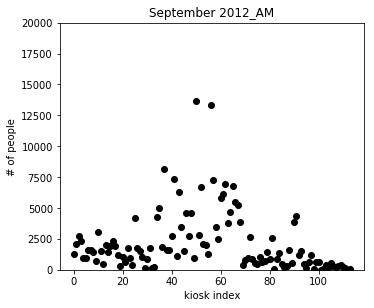

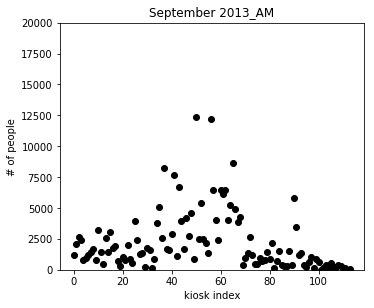

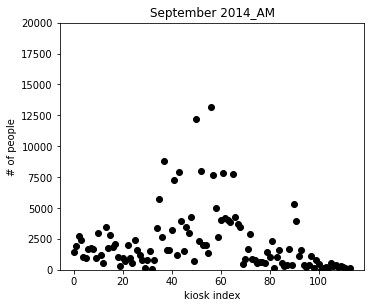

In [16]:
import matplotlib.pyplot as plt
#ped_street = pedestrian.ix[:, 3].tolist() # series to list

for i in range(1,5):
    plt.figure(figsize = (12,10))  
    plt.subplot(2,2,i) #int('22'+str(i)))
    plt.scatter(x = range(len(pedestrian)), y = pedestrian["Sept1"+str(i)+"_AM"], color = "black")
    plt.xlabel("kiosk index")
    plt.ylabel("# of people")
    plt.ylim([0, 20000])
    plt.title("September 201"+str(i)+"_AM")
    
   
plt.show()

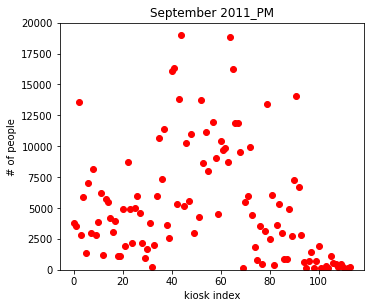

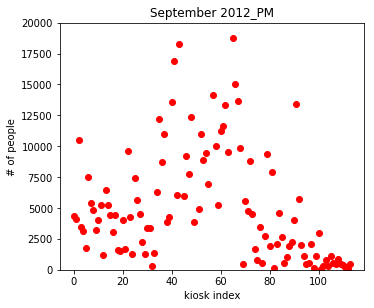

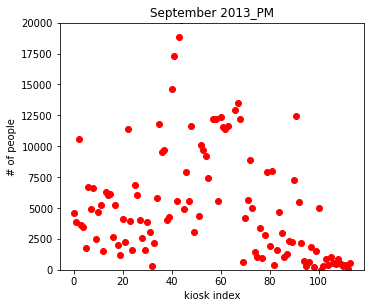

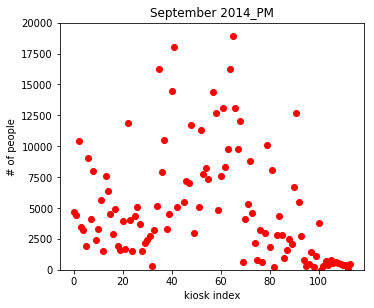

In [17]:
for i in range(1,5):
    plt.figure(figsize = (12,10))  
    plt.subplot(2,2,i) #int('22'+str(i)))
    plt.scatter(x = range(len(pedestrian)), y = pedestrian["Sept1"+str(i)+"_PM"], color = "red")
    plt.xlabel("kiosk index")
    plt.ylabel("# of people")
    plt.ylim([0, 20000])
    plt.title("September 201"+str(i)+"_PM")
    
   
plt.show()

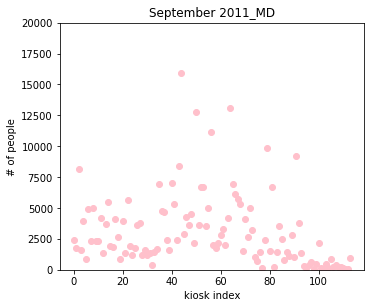

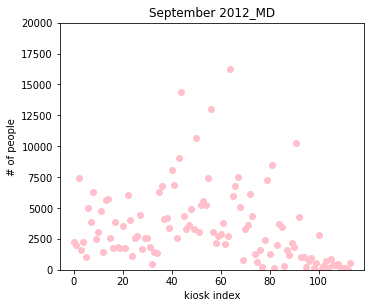

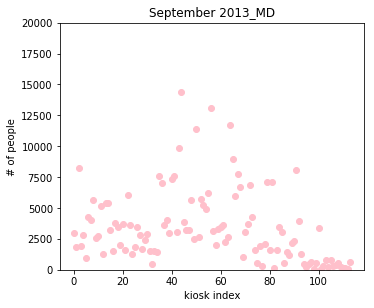

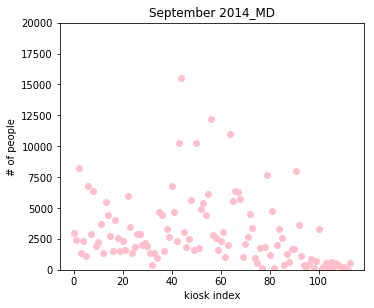

In [18]:
for i in range(1,5):
    plt.figure(figsize = (12,10))  
    plt.subplot(2,2,i) #int('22'+str(i)))
    plt.scatter(x = range(len(pedestrian)), y = pedestrian["Sept1"+str(i)+"_MD"], color = "pink")
    plt.xlabel("kiosk index")
    plt.ylabel("# of people")
    plt.ylim([0, 20000])
    plt.title("September 201"+str(i)+"_MD")
    
   
plt.show()

## Kiosk & Pedestrian

In [19]:
print sum(pedestrian["May15_MD"] > 8000),"places are crowded,", sum(pedestrian["May15_MD"] < 200),"places are silent"

9 places are crowded, 6 places are silent


In [20]:
crowded_places = np.where(pedestrian["May15_MD"] > 8000)[0]; silent_places = np.where(pedestrian["May15_MD"] < 200)[0]
crowded_places = crowded_places.tolist()#, silent_places
silent_places = silent_places.tolist()
print crowded_places,silent_places

[35, 40, 43, 44, 50, 56, 64, 68, 91] [82, 98, 101, 109, 111, 112]


In [21]:
crowded_place_lat = []
crowded_place_long = []

for place in crowded_places:
    crowded_place_lat.append(pedestrian.ix[place]["Latitude"])
    crowded_place_long.append(pedestrian.ix[place]["Longitude"])
    
silent_place_lat = []
silent_place_long = []

for place in silent_places:
    silent_place_lat.append(pedestrian.ix[place]["Latitude"])
    silent_place_long.append(pedestrian.ix[place]["Longitude"])

In [22]:
import plotly.plotly as py
from plotly.graph_objs import *

mapbox_access_token = 'pk.eyJ1IjoiY2hlbHNlYXBsb3RseSIsImEiOiJjaXFqeXVzdDkwMHFrZnRtOGtlMGtwcGs4In0.SLidkdBMEap9POJGIe1eGw'


data = Data([
    Scattermapbox(
        lat=kiosk_latitude_list,
        lon=kiosk_longitude_list,
        mode='markers',
        marker=Marker(
            size=4
        ),
        text= kiosk_street_address, 
        name = "NYCLink"
    ),
    Scattermapbox(
        lat=subway_entrance_latitude_list, 
        lon=subway_entrance_longitude_list,
        mode='markers',
        marker=Marker(
            size=4
        ),
        text= subway_entrance_name_list, 
        name = "Subway"
    ),
    Scattermapbox(
        lat= crowded_place_lat, 
        lon= crowded_place_long,
        mode='markers',
        marker=Marker(
            size=9
        ),
        text= subway_entrance_name_list, 
        name = "Crowded places"
    ),
    Scattermapbox(
        lat= silent_place_lat,
        lon= silent_place_long,
        mode='markers',
        marker=Marker(
            size=9
        ),
        text= subway_entrance_name_list, 
        name = "Silent places"
    )
])
layout = Layout(
    title='Crowded places & Silent places',
    autosize=False, # False: could adjust the graph size manually
    width=1000,
    height=1000,
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat= 40.730534,
            lon= -73.907244 # where I want to make the center of my map
        ),
        pitch=0,
        zoom=10
    ),
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='Multiple Mapbox', validate=False)

### Small Insight 

- Manhattan 중심부, Battery Park, Flushing 지역의 유동인구가 많음에도 불구하고 Kiosk가 없다??? 
 - 걷는 사람이 많이 없어서 아닐까? 특히 배터리 파크와 플러싱에서는 바로 지하철을 타서 다른 지역으로 이동하는 비율이 높아서??
 
 
- 맨하튼 중심부를 직사각형으로 감싼 형태를 띄고 있는데 이유가 있을까?
 - 이유

## Transportation  발전시켜야할 부분

In [23]:
PLACE_OF_WORK = pd.read_csv('~/dss4/LinkNYC/transportation_data/(Preprocessed)PLACE OF WORK FOR WORKERS 16 YEARS AND OVER--METROPOLITAN STATISTICAL AREA LEVEL.csv')
PLACE_OF_WORK

,Type,Estimate,Margin of Error
0,Total:,"3,992,612","+/-21,149"
1,Worked in Metropolitan Statistical Area of r...,"3,953,634","+/-21,160"
2,Worked in a principal city,"3,731,459","+/-21,396"
3,Worked outside any principal city,"222,175","+/-9,593"
4,Worked in a different Metropolitan Statistic...,"33,965","+/-3,194"
5,Worked in a principal city,"18,238","+/-2,028"
6,Worked outside any principal city,"15,727","+/-2,340"
7,Worked in a Micropolitan Statistical Area,"1,639",+/-629
8,Worked outside any Metropolitan or Micropoli...,"3,374","+/-1,107"


# Part 2. Usage Analysis

# CSV 불러올 때 인덱스 문제 해결해야함

In [24]:
LinkNYC_usage = pd.read_csv('~/dss4/LinkNYC/wifi_related_csv/(preprocessed)LinkNYC_Usage_Statistics.csv')
LinkNYC_usage.tail()

,Unnamed: 0,Week,Sessions Per Week,Cumulative Sessions To Date,Bandwidth Utilization Per Week (TB),Cumulative Bandwidth Utilization To Date (TB),Average Session Duration(sec),New Subscribers Per Week,Total Subscribers Per Week,Cumulative Subscribers To Date,Average Sessions Per Subscriber
51,51,Week of 2/20/2017,5276948,109777685,36.25,829.40,264,33925,335773,1228904,15.715820
52,52,Week of 2/27/2017,5395485,115173170,36.57,870.86,260,27546,337532,1256450,15.985107
53,53,Week of 3/6/2017,5246526,120419696,36.08,911.88,262,24201,337109,1280651,15.563293
54,54,Week of 3/13/2017,5089725,125509421,34.37,951.31,275,28588,329391,1309239,15.451925
55,55,Week of 3/20/2017,5967035,131476456,39.91,996.62,265,30209,353800,1339448,16.865560


### Unexpected column named 'Unnamed: 0' continuously appears. To remove it, I took the process below.

In [25]:
LinkNYC_usage = LinkNYC_usage.drop("Unnamed: 0", axis = 1)
LinkNYC_usage.tail()

,Week,Sessions Per Week,Cumulative Sessions To Date,Bandwidth Utilization Per Week (TB),Cumulative Bandwidth Utilization To Date (TB),Average Session Duration(sec),New Subscribers Per Week,Total Subscribers Per Week,Cumulative Subscribers To Date,Average Sessions Per Subscriber
51,Week of 2/20/2017,5276948,109777685,36.25,829.40,264,33925,335773,1228904,15.715820
52,Week of 2/27/2017,5395485,115173170,36.57,870.86,260,27546,337532,1256450,15.985107
53,Week of 3/6/2017,5246526,120419696,36.08,911.88,262,24201,337109,1280651,15.563293
54,Week of 3/13/2017,5089725,125509421,34.37,951.31,275,28588,329391,1309239,15.451925
55,Week of 3/20/2017,5967035,131476456,39.91,996.62,265,30209,353800,1339448,16.865560


In [26]:
import plotly.plotly as py
import plotly.graph_objs as go

Average_Session_Duration_list = LinkNYC_usage["Average Session Duration(sec)"].tolist()
Average_Session_Duration_list = map(int, Average_Session_Duration_list) #preprocessing for y

Average_Session_Duration = go.Scatter(
    x = np.arange(len(LinkNYC_usage)),
    y = Average_Session_Duration_list
)

data = [Average_Session_Duration]
layout = go.Layout(
    title = "Average Session Duration(sec)",
    xaxis=dict(
        title = "week",
        autotick=False,
        ticks='outside',
        tick0=0,
        dtick=1,
        ticklen=8,
        tickwidth=4,
        tickcolor='#000'
    ),
    yaxis=dict(
        title = "seconds",
        autotick=False,
        ticks='outside',
        tick0=0,
        dtick=20,
        ticklen=8,
        tickwidth=4,
        tickcolor='#000'
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='axes-ticks')

### I might have imputed wrong value to week 40's Average Session Duration(sec) because it has a too big decreasing. I used 'imputation_mean_total' in preprocessing file. Let's take a closer look at it later.

In [27]:
New_Subscribers_Per_Week_list = LinkNYC_usage["New Subscribers Per Week"].tolist()
New_Subscribers_Per_Week_list = map(int, New_Subscribers_Per_Week_list)

New_Subscribers_Per_Week = go.Scatter(
    x = np.arange(len(LinkNYC_usage)),
    y = New_Subscribers_Per_Week_list
)

data = [New_Subscribers_Per_Week]
layout = go.Layout(
    title = "New Subscribers Per Week",
    xaxis=dict(
        title = "week",
        autotick=False,
        ticks='outside',
        tick0=0,
        dtick=1,
        ticklen=8,
        tickwidth=4,
        tickcolor='#000'
    ),
    yaxis=dict(
        title = "subscribers",
        autotick=False,
        ticks='outside',
        tick0=0,
        dtick=2000,
        ticklen=8,
        tickwidth=4,
        tickcolor='#000'
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='axes-ticks')


In [28]:
Cumulative_Subscribers_To_Date_list = LinkNYC_usage["Cumulative Subscribers To Date"].tolist()
Cumulative_Subscribers_To_Date_list = map(int, Cumulative_Subscribers_To_Date_list)

Cumulative_Subscribers_To_Date = go.Scatter(
    x = np.arange(len(LinkNYC_usage)),
    y = Cumulative_Subscribers_To_Date_list
)

data = [Cumulative_Subscribers_To_Date]
layout = go.Layout(
    title = "Cumulative Subscribers To Date",
    xaxis=dict(
        title = "week",
        autotick=False,
        ticks='outside',
        tick0=0,
        dtick=1,
        ticklen=8,
        tickwidth=4,
        tickcolor='#000'
    ),
    yaxis=dict(
        title = "subscribers",
        autotick=False,
        ticks='outside',
        tick0=0,
        dtick=100000,
        ticklen=8,
        tickwidth=4,
        tickcolor='#000'
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='axes-ticks')


In [29]:
Average_Sessions_Per_Subscriber_list = LinkNYC_usage["Average Sessions Per Subscriber"].tolist()
Average_Sessions_Per_Subscriber_list = map(float, Average_Sessions_Per_Subscriber_list)

Average_Sessions_Per_Subscriber = go.Scatter(
    x = np.arange(len(LinkNYC_usage)),
    y = Average_Sessions_Per_Subscriber_list
)

data = [Average_Sessions_Per_Subscriber]
layout = go.Layout(
    title = "Average Sessions Per Subscriber",
    xaxis=dict(
        title = "week",
        autotick=False,
        ticks='outside',
        tick0=0,
        dtick=1,
        ticklen=8,
        tickwidth=4,
        tickcolor='#000'
    ),
    yaxis=dict(
        title = "sessions",
        autotick=False,
        ticks='outside',
        tick0=0,
        dtick=2,
        ticklen=8,
        tickwidth=4,
        tickcolor='#000'
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='axes-ticks')


### What the hell had happend from week 27 to week 32 and from week 38 to week 42? 

In [30]:
print LinkNYC_usage.ix[27:33, 0]
print "*"*30
print LinkNYC_usage.ix[37:42, 0]

27      Week of 9/5/2016
28     Week of 9/12/2016
29     Week of 9/19/2016
30     Week of 9/26/2016
31     Week of 10/3/2016
32    Week of 10/10/2016
33    Week of 10/17/2016
Name: Week, dtype: object
******************************
37    Week of 11/14/2016
38    Week of 11/21/2016
39    Week of 11/28/2016
40     Week of 12/5/2016
41    Week of 12/12/2016
42    Week of 12/19/2016
Name: Week, dtype: object


### Let's check 27th~32nd week first.


- [Google Advanced Search for Specific Date: 9/5/2016 ~ 10/16/2016](https://www.google.co.kr/search?q=LinkNYC&biw=1360&bih=638&source=lnt&tbs=cdr%3A1%2Ccd_min%3A9%2F5%2F2016%2Ccd_max%3A10%2F16%2F2016&tbm=nws)


- [LinkNYC Discovers the Difficulty of Bringing Free Wi-Fi to City Streets: 9/20/2016](https://motherboard.vice.com/en_us/article/linknyc-free-public-wifi-removes-browser)


- [LinkNYC kiosks usage rises 12 percent one month after web browsing disabled: 10/4/2016](http://www.nydailynews.com/new-york/linknyc-kiosks-usage-rises-12-month-web-browsing-disabled-article-1.2817227)

### small Insight
- There is a lot of reports concluding negative words such as porn, masterbation, etc.

$--------------------------------------------------------------$

### 37th~42nd week next.


- [LinkNYC Now Live in All 5 Boroughs](http://www.lightreading.com/gigabit/gigabit-cities/-linknyc-now-live-in-all-5-boroughs/d/d-id/728969)


- [LinkNYC sets up first kiosks in Brooklyn](https://www.6sqft.com/linknyc-sets-up-first-kiosks-in-brooklyn-see-all-311-reported-blocked-bike-lanes-in-new-interactive-map/)

### small Insight
- LinkNYC Kiosks are finally installed outside of Manhattan such as Brooklyn, Staten Island.

# Part 3. Language Analysis

## Twitter

- Firehose API 
- Stemming으로 running 등을 run으로 가져옴
- stopword 이용하여 is, the 등 제거

### Too many obstacles for twitter crawling... I should find another way.
- [Is it impossible to crawl the data at specific date?](http://stackoverflow.com/questions/12215671/crawl-twitter-data-according-to-specific-date)

## Google Search Result